In [1]:
%pylab inline
import sncosmo
from sncosmo.photdata import standardize_data




Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
data = sncosmo.io.read_lc('lc-SDSS2635.list', format='salt2')

In [3]:
data

Date,Flux,Fluxerr,ZP,Filter,MagSys
float64,float64,float64,float64,str7,str6
53622.473,43.94,12.98,27.5,SDSS::g,AB_B12
53622.473,72.54,18.804,27.5,SDSS::r,AB_B12
53622.473,63.82,29.008,27.5,SDSS::i,AB_B12
53622.473,144.93,86.995,27.5,SDSS::z,AB_B12
53622.473,-12.09,35.08,27.5,SDSS::u,AB_B12
53627.43,404.93,21.012,27.5,SDSS::g,AB_B12
53627.43,387.24,24.075,27.5,SDSS::r,AB_B12
53627.43,410.74,34.307,27.5,SDSS::i,AB_B12
53627.43,198.5,113.574,27.5,SDSS::z,AB_B12


In [4]:
# Fix the filter and magsys names
data['Filter'] = ['sdss%s'%a[-1] for a in data['Filter']]
data['MagSys'] = ['ab' for a in data['MagSys']]

In [5]:
data.meta

OrderedDict([('TRESTMAX', 56.92),
             ('MWEBV_ERR', 0.0),
             ('SNRMAX_z', 4.434),
             ('MWEBV', 0.0974),
             ('ZPERR_SDSS::u', 0),
             ('SNRMAX_r', 35.712),
             ('SNRMAX2', 35.71),
             ('SNRMAX3', 21.74),
             ('SNRMAX_u', 6.252),
             ('DayMax', '53640.270  1'),
             ('SNRMAX_i', 21.745),
             ('ZPERR_SDSS::g', 0),
             ('ZPERR_SDSS::i', 0),
             ('SNRMAX_g', 40.95),
             ('SNRMAX', 40.95),
             ('ZPERR_SDSS::r', 0),
             ('T0GAPMAX', 9.46),
             ('NOBS', 123.0),
             ('TRESTMIN', -15.56),
             ('Z_CMB', 0.1431),
             ('Z_HELIO', 0.1437),
             ('SNTYPE', 120.0),
             ('ZPERR_SDSS::z', 0),
             ('SURVEY', 'SDSS'),
             ('SN', 2635.0)])

In [6]:
# Fit the lc
# First need to add MW dust correction to model
dust = sncosmo.CCM89Dust()
model = sncosmo.Model(source='salt2',
                      effects=[dust],
                      effect_names=['mw'],
                      effect_frames=['obs'])

In [7]:
data.meta['Z_HELIO']

0.1437

In [8]:
# redshift and MW E(B-V) were in file header 
model.set(z=data.meta['Z_HELIO'], mwebv=data.meta['MWEBV'])
res, fitted_model = sncosmo.fit_lc(data, model, ['t0', 'x0', 'x1', 'c'])

/usr/local/lib/python2.7/site-packages/sncosmo/fitting.py:132: RuntimeWarning: Dropping following bands from data: 'sdssz'(out of model wavelength range)
  "(out of model wavelength range)", RuntimeWarning)


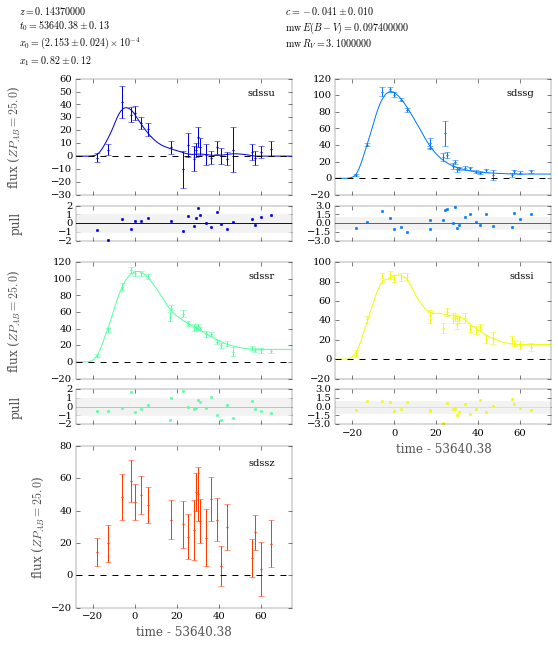

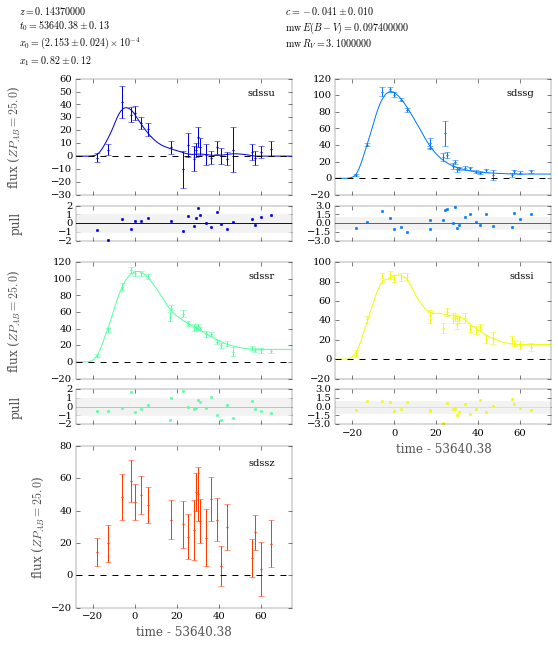

In [9]:
sncosmo.plot_lc(data, model=fitted_model, errors=res.errors)

In [21]:
model.bandflux?

In [18]:
fitted_model.parameters

array([  1.43700000e-01,   5.36403788e+04,   2.15257821e-04,
         8.21488203e-01,  -4.09499015e-02,   9.74000000e-02,
         3.10000000e+00])

In [10]:
newData = sncosmo.photdata.standardize_data(data)
newData= sncosmo.photdata.normalize_data(newData)
newData=sncosmo.fitting.cut_bands(newData,model)

In [11]:
set(newData['band'])

{'sdssg', 'sdssi', 'sdssr', 'sdssu'}

In [32]:
fitted_model.bandflux(newData['band'],newData['time'])

array([  3.03498369e-04,   4.02546110e-04,   2.79049325e-04,
         1.03566253e-05,   2.18516384e-03,   1.96551111e-03,
         1.36033014e-03,   1.00001439e-04,   5.12927839e-03,
         4.48729657e-03,   2.83357107e-03,   2.72212221e-04,
         5.70757473e-03,   5.19923165e-03,   3.01860243e-03,
         2.69559404e-04,   5.64374298e-03,   5.34757174e-03,
         3.09350234e-03,   2.40437865e-04,   5.25743771e-03,
         5.31498909e-03,   3.11533171e-03,   1.84808544e-04,
         4.68833090e-03,   5.01984058e-03,   2.94921530e-03,
         1.35428249e-04,   2.15090941e-03,   3.10141740e-03,
         1.73648401e-03,   2.11768646e-03,   3.07637883e-03,
         1.72976479e-03,   4.29239080e-05,   1.21678355e-03,
         2.45658168e-03,   1.67901044e-03,   1.98517352e-05,
         1.12274306e-03,   1.02686190e-03,   2.30351034e-03,
         1.63513754e-03,   1.28266359e-05,   8.11539651e-04,
         2.09157400e-03,   1.60704017e-03,   1.03099062e-05,
         7.60473056e-04,

In [66]:
data.meta['MWEBV']

0.0974

In [65]:
fitted_model.param_names

['z', 't0', 'x0', 'x1', 'c', 'mwebv', 'mwr_v']

In [12]:
import pymc3 as pm
import theano.tensor as T
from theano.compile.ops import as_op
import scipy.optimize as optimize


In [13]:
@as_op(itypes=[T.dscalar,T.dscalar,T.dscalar,T.dscalar],otypes=[T.dvector])
def get_flux(t0,x0,x1,c):
    
    model.parameters = [data.meta['Z_HELIO'],t0,x0,x1,c,data.meta['MWEBV'],3.1]
    return model.bandflux(newData['band'],newData['time'],zp=newData['zp'],zpsys=newData['zpsys'])
    
get_flux.grad=lambda *x: x[0]  
    
    

In [14]:
lcModel= pm.Model()


with lcModel:
    
    #z  = pm.Uniform('z',lower=0.,upper=1.)
    t0 = pm.Uniform('t0',lower=newData['time'].min(),upper=newData['time'].max())
    x0 = pm.Uniform('x0',lower=1E-5, upper=1E-3)
    x1 = pm.Normal('x1',mu=0., sd=3.)
    c  = pm.Normal('c',mu=0., sd=1.)
    
    sigma = pm.HalfCauchy('sigma',beta=2.5,shape=len(newData['flux']))
    
    #mwebv  = pm.Normal('mwebv',mu=0.,sd=1)
    #mwr  = pm.Normal('mwr',mu=3.,sd=1)
    
    #points = pm.Normal('points',mu=get_flux(t0,x0,x1,c),sd=newData['fluxerr'],observed=newData['flux'])
    points = pm.Normal('points',mu=get_flux(t0,x0,x1,c),sd=sigma,observed=newData['flux'])
    
    
    
    
    


In [15]:
with lcModel:
    
    start=pm.find_MAP(fmin=optimize.fmin_powell)
    

In [16]:
start

{'c': array(-0.055353394331977356),
 'sigma_log': array([-0.13466326, -1.39702242, -0.04095834,  0.86948176,  0.9308909 ,
         0.29761336,  1.40762064,  1.77876011,  2.0165715 , -1.07008353,
         1.42841982,  1.18746727, -0.06686457,  1.39275649,  0.82929695,
         1.49331647,  1.43235581,  0.89840315,  1.2460211 , -0.61486782,
         1.05501056,  0.59308779,  0.78132895, -0.22349545,  1.28055202,
        -0.30345732,  1.13148967,  0.89753216,  1.41745184,  1.79349001,
         1.32593586,  0.03460649,  1.15626656,  1.06342185,  0.48386124,
         1.26378567,  1.93743302,  2.32230879,  2.2522668 ,  3.19761248,
         1.96927382,  0.24375256,  1.07657952,  1.66464044, -0.08700615,
        -0.32223012,  0.42759868,  1.11424375,  1.64458141,  0.27381125,
        -0.01412376,  1.09422668,  0.67966647,  1.30565949,  1.60210025,
         2.26268501, -2.4167648 ,  1.02232753,  0.57781167,  1.51708658,
         0.96816407,  0.41735755,  1.33081508, -0.98409793,  1.09742762,
  

In [19]:
with lcModel:
    
    step=pm.Metropolis()
    trace=pm.sample(10000,start=start,step=step,progressbar=True)
    
    

 [-----------------100%-----------------] 10000 of 10000 complete in 128.2 sec

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125f54910>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1283aa790>]], dtype=object)

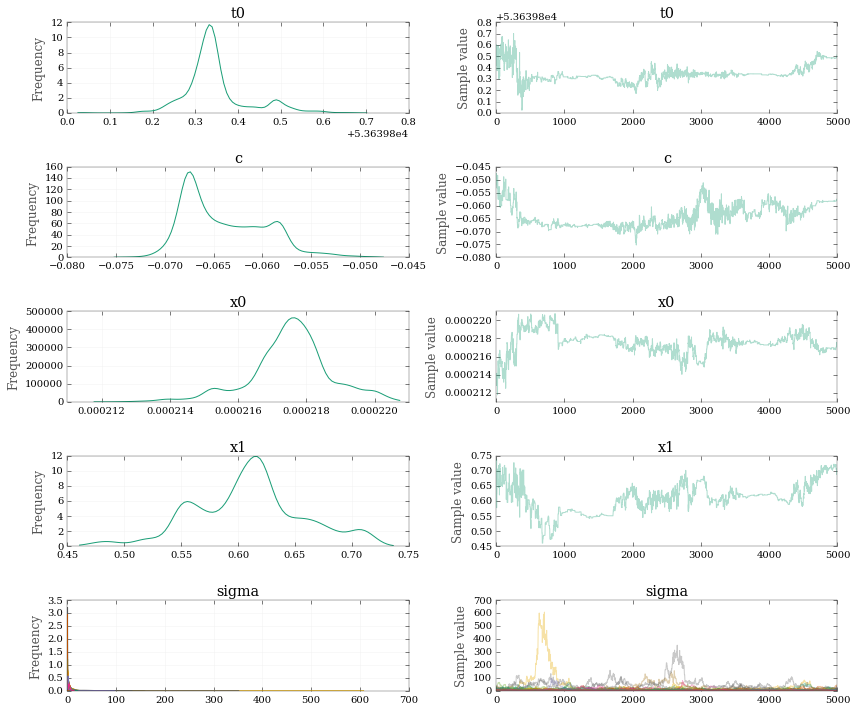

In [22]:

pm.traceplot(trace[5000:],vars=['t0','c','x0','x1','sigma'])

In [28]:
pm.summary(trace[2500:],vars=['t0','c','x0','x1','sigma'])


t0:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  53640.240        0.152            0.015            [53640.036, 53640.538]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  53640.038      53640.124      53640.155      53640.377      53640.544


c:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -0.057           0.012            0.001            [-0.071, -0.036]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.069         -0.067         -0.061         -0.048         -0.031


x0:

  Mean             SD               MC Error         95% HPD interval
  --------------------

In [126]:
10**-3.668

0.00021478304741305332

In [23]:
bands= unique(newData['band'])
times = linspace(newData['time'].min(),newData['time'].max(),100)


<Container object of 3 artists>

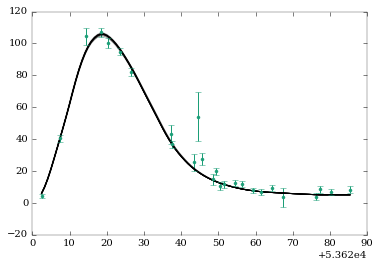

In [29]:
burnin = 7000
thin=50

whichBand=0

unwanted=['t0_interval','x0_interval','sigma_log','sigma']
for tr in trace[burnin::thin]:
    for x in unwanted: del tr[x]
    
    model.set(**tr)
    
    plot(times,model.bandflux(bands[whichBand],times,zp=newData['zp'],zpsys=newData['zpsys']),'k-',alpha=0.1)

tt = newData['band'] == bands[whichBand]
errorbar(newData['time'][tt],newData['flux'][tt],yerr=newData['fluxerr'][tt],fmt='.')
    
    
    
    


(0.0, 50)

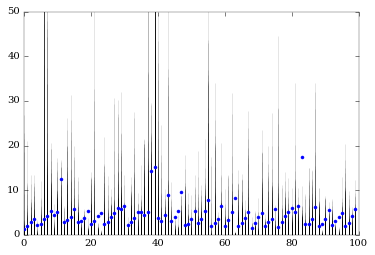

In [36]:
for tr in trace['sigma'][burnin::thin]:
    
    vlines(arange(len(tr)),[0]*len(tr),tr,'k',alpha=.1)
    
plot(arange(len(newData['fluxerr'])),newData['fluxerr'],'b.')

ylim(top=50)



In [176]:
tt

array([ True, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False,  True, False, False, False,  True,
       False, False, False,  True,  True, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False, False, False], dtype=bool)

In [169]:
tt

'sdssg'

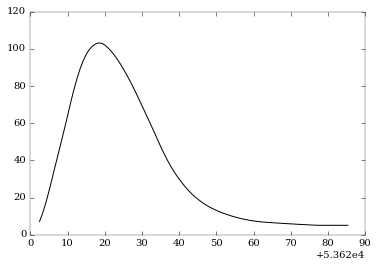

In [161]:
plot(times,model.bandflux(bands[0],times,zp=newData['zp'],zpsys=newData['zpsys']),'k-')

TypeError: 'set' object does not support indexing